In [1]:
from fastai.tabular.all import *
import pandas as pd

In [2]:
train_path = "/content/drive/MyDrive/Fastai Pytorch/Lessons/Lesson 3/train.csv"
test_path = "/content/drive/MyDrive/Fastai Pytorch/Lessons/Lesson 3/test.csv"
gender_sub_path = "/content/drive/MyDrive/Fastai Pytorch/Lessons/Lesson 3/gender_submission.csv"

In [3]:
train = pd.read_csv(train_path)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv(test_path)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Example of Final Submission

In [5]:
gender_sub = pd.read_csv(gender_sub_path)
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
procs = [Categorify, FillMissing, Normalize]
cat_names = ['Sex', 'Cabin', 'Embarked', 'Pclass']
cont_names = ['Age', 'SibSp', 'Parch', 'Fare']
y_names = 'Survived'

In [7]:
dls = TabularDataLoaders.from_df(
    train,
    procs=procs,
    cat_names=cat_names,
    cont_names=cont_names,
    y_names=y_names,
    valid_pct=0.2,
    bs=64,
    y_block = CategoryBlock()
)

/usr/local/lib/python3.12/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [8]:
learn = tabular_learner(dls, metrics=accuracy)

In [9]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.669909,0.683003,0.449438,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.554484,0.682342,0.483146,00:00
1,0.589461,0.695079,0.432584,00:00
2,0.578339,0.593159,0.764045,00:00
3,0.548208,0.491117,0.747191,00:00
4,0.521177,0.446107,0.792135,00:00
5,0.513860,0.438531,0.792135,00:00
6,0.482836,0.405090,0.842697,00:00
7,0.460043,0.412813,0.831461,00:00
8,0.425220,0.404339,0.837079,00:00
9,0.415987,0.407799,0.831461,00:00


In [10]:
preds, y_true = learn.get_preds(dl=dls.valid)
y_pred = torch.argmax(preds, dim=1)

Accuracy: 0.8315


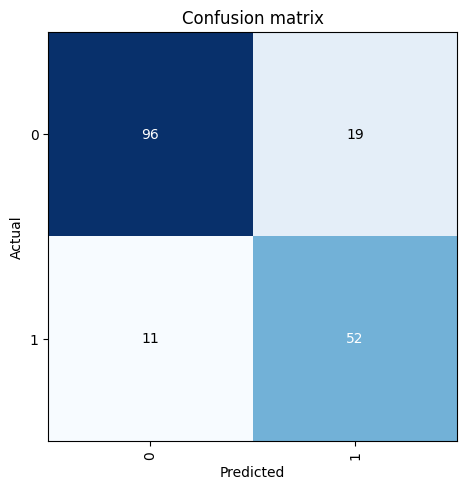

In [11]:
from fastai.metrics import *

acc = accuracy(preds, y_true)
print(f'Accuracy: {acc.item():.4f}')

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [12]:
fare_median = test['Fare'].median()
test['Fare'].fillna(fare_median, inplace=True)

test_dl = dls.test_dl(test)
preds, _ = learn.get_preds(dl=test_dl)
y_pred = torch.argmax(preds, dim=1)

/tmp/ipython-input-2169858243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(fare_median, inplace=True)
/usr/local/lib/python3.12/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [13]:
submission_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred.numpy()
})

In [14]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [15]:
submission_df.to_csv("/content/drive/MyDrive/Fastai Pytorch/Lessons/Lesson 3/submission.csv", index=False)

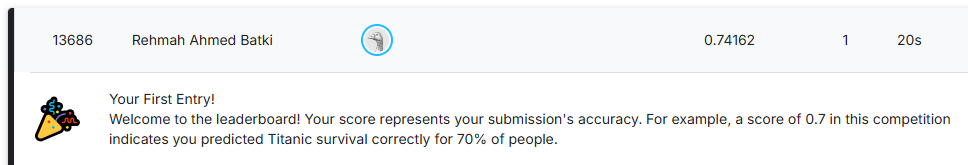